Steps


1.   Problem Statement
2.   Import Libraries

1.   Exploratory Data Analysis
2.   Data Preparation

1.   Evaluate Models
2.   Model Tuning

1.   Finalize the Model
2.   Prepare for Prediction

# Problem Statement
The accompanying data is real stock data with a made up ticker and dates. We have removed the last day’s closing price, but have included other real stock data up to that day so you have exogenous factors to include. All prices are closing prices. Assume you can buy at close. 

1.   Plot the daily returns of MMAX over the entire period using your choice of graph
2.   Train at least 3 models to predict the missing stock price of MMX
*    Explain any data pre-processing you used 
*    Explain your feature selection process
*    Explain why you chose the models you did
*    Present the performance of each model and from those, select a single model to move forward with
*    Print out the stock price prediction
*    What is your confidence in the prediction? 
3.   Bonus points will be awarded to the best predictions. The top 10% of submissions by prediction accuracy will get the bonus.


# Import Libraries and Datasets

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,  f_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.arima_model import ARIMA

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# for google colab, need to upload the file to the drive
from google.colab import files
uploaded = files.upload()

Saving MMA823_AssignmentData_topost.xlsx to MMA823_AssignmentData_topost (1).xlsx


In [3]:
stock_price = pd.read_excel("MMA823_AssignmentData_topost.xlsx").set_index("Date")
stock_price

,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,TWTR,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
Date,,,,,,,,,,,,,,,,,,,,,
1,33.482319,34.465744,50.064999,976.619995,137.422821,30.548828,76.522003,26.870838,53.836395,18.150000,...,16.140646,63.823997,199.325455,208.325409,2434.50,21397.29,10.48,111.36,1.2659,1.1148
2,34.008343,34.619576,50.187000,986.090027,137.280762,30.557764,76.690002,26.957619,54.107803,18.500000,...,16.183868,64.019783,202.829193,207.332001,2438.30,21394.76,10.02,111.26,1.2727,1.1196
3,33.785179,34.510723,49.699001,972.090027,136.677109,30.843687,75.498001,26.855061,53.954002,18.290001,...,16.382711,63.853378,202.838623,209.080063,2439.07,21409.55,9.90,111.48,1.2732,1.1196
4,31.489799,34.016071,48.839001,948.090027,136.464066,30.566696,72.473999,26.642052,53.338821,18.120001,...,16.261677,62.110935,201.868484,203.597061,2419.38,21310.66,11.06,112.42,1.2791,1.1300
5,32.023800,34.513088,49.516499,961.010010,136.978943,30.897297,74.248001,26.626272,53.537861,17.950001,...,16.252941,62.022831,204.524536,204.036484,2440.69,21454.61,10.03,112.18,1.2936,1.1364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,112.766838,179.836319,169.669495,2958.129883,265.285767,57.430000,1093.939941,58.278038,112.848961,44.330002,...,17.453543,155.113174,255.381592,554.017944,4791.19,36302.38,17.68,114.85,1.3438,1.1329
1138,112.995125,178.799164,170.660995,2933.739990,264.929749,57.110001,1088.469971,57.106567,114.182762,43.430000,...,17.453543,154.843491,255.570953,554.574707,4786.35,36398.21,17.54,114.75,1.3432,1.1314
1139,114.146523,178.888916,169.201004,2933.100098,265.533020,57.230000,1086.189941,56.683266,114.983032,42.759998,...,17.453543,155.193085,256.617401,559.178162,4793.06,36488.63,16.95,114.97,1.3475,1.1337


# 1. Plot the daily returns of MMAX over the entire period using choice of graph

In [4]:
# retrieve stock data for ticker MMAX into a new dataframe and set column Date as dataframe index
mmax=stock_price[["MMAX"]]
mmax.head()

,MMAX
Date,
1,33.482319
2,34.008343
3,33.785179
4,31.489799
5,32.023800


In [5]:
mmax['Daily_Return']=mmax['MMAX'].pct_change() # calculate the daily percentage return of MMAX
mmax.dropna(inplace=True) # drop instances with null valu
mmax

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,MMAX,Daily_Return
Date,,
2,34.008343,0.015710
3,33.785179,-0.006562
4,31.489799,-0.067940
5,32.023800,0.016958
6,31.011595,-0.031608
...,...,...
1136,110.593086,0.010063
1137,112.766838,0.019655
1138,112.995125,0.002024


In [6]:
# Stock Information Summary
mmax.describe().round(4)

,MMAX,Daily_Return
count,1139.0000,1139.0000
mean,51.9052,0.0014
std,19.4236,0.0239
min,24.6674,-0.1650
25%,40.2458,-0.0089
50%,46.4126,0.0020
75%,55.5122,0.0131
max,114.1465,0.1262


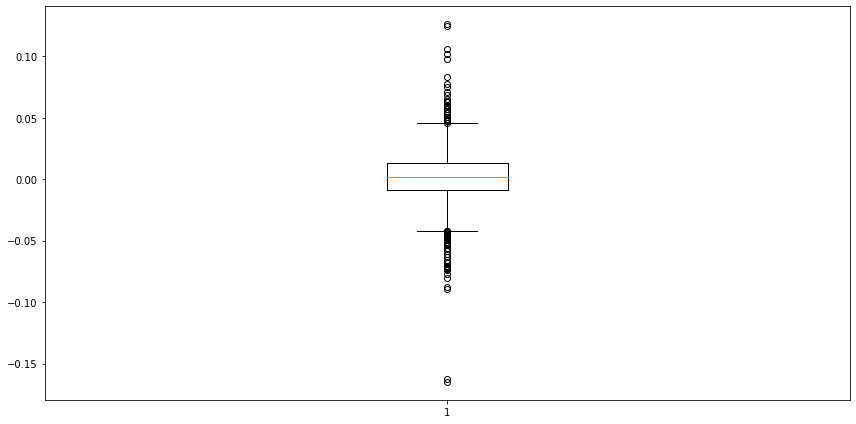

In [7]:
# plot the daily return of MMAX by using Boxplot
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
plt.boxplot(mmax["Daily_Return"])
plt.tight_layout()

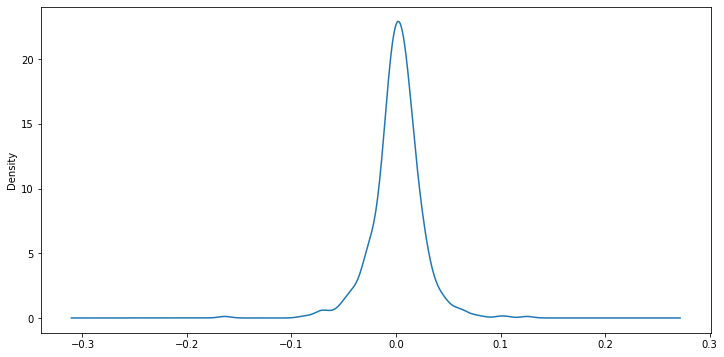

In [8]:
# plot the daily return of MMAX by using Density Plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax = mmax["Daily_Return"].plot.kde()

### Preparation for modelling

In [9]:
# Create a vector ‘Y’ that is the natural log of the differenced close price for MMAX, and then shift that value back by 1 period
# In this case, we get today’s dollar return next to yesterday’s date
# We are going to use previous day's info to predict next day's return
return_period=1
Y = np.log(stock_price.iloc[:, 0]).diff(return_period).shift(-return_period)
Y.name +='_pred'

In [10]:
# Create an object ‘X1’ - the natural log of the differenced close price for the rest of the stocks
X1 = np.log(stock_price.iloc[:, 1:]).diff(return_period)

In [11]:
# Create an object ‘X2’ which is the natural log of the differenced price at 1 month, 3 months, 6 months, 1 year time periods
X2 = pd.concat([np.log(stock_price.iloc[:, 0]).diff(i) for i in [21, 63, 126, 252]], axis=1).dropna()
X2.columns = ['1M', '3M', '6M', '1Y']

In [12]:
# Combine object 'X1' and 'X2' into one single dataset
X = pd.concat([X1, X2], axis=1)

In [13]:
# Combine Y and X into a new dataset
data = pd.concat([Y, X], axis=1).dropna()

In [14]:
# Create a vector of just Y and a dataframe X with all the columns
Y = data.loc[:, Y.name]
X = data.loc[:, X.columns]

In [15]:
# checking shape of datasets 
print(Y.shape)
print(X1.shape)
print(X2.shape)
print(data.shape)

(887,)
(1141, 23)
(888, 4)
(887, 28)


### Converting the data to supervised regression format

In [16]:
def series_to_supervised(data, lag=1):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)    
    cols, names = list(), list()
    for i in range(lag, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (df.columns[j], i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg = pd.DataFrame(data.iloc[:,0]).join(agg)
    agg.dropna(inplace=True)
    return agg

In [17]:
dataset= series_to_supervised(data,1)
dataset.tail(5)

,MMAX_pred,MMAX_pred(t-1),AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),...,SP500(t-1),DJIA(t-1),VIXCLS(t-1),DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
Date,,,,,,,,,,,,,,,,,,,,,
1135,0.010012,0.009930,0.018907,0.019782,0.013088,0.010112,0.013783,0.041987,-0.034512,0.020874,...,0.017622,0.015919,-0.084827,0.005801,0.002342,-0.002304,0.087105,0.281927,0.268331,0.559687
1136,0.019465,0.010012,0.015203,0.003632,0.020302,0.002078,0.023272,0.072271,0.010127,0.012336,...,0.010129,0.007332,-0.120225,0.000964,0.006918,0.004603,0.088735,0.266854,0.259213,0.580079
1137,0.002022,0.019465,0.003637,0.000184,0.003419,0.003805,0.014692,0.056020,-0.014206,0.005622,...,0.006204,0.005486,-0.036626,0.001749,0.004859,-0.000353,0.099141,0.264710,0.267953,0.600822
1138,0.010138,0.002022,0.022715,-0.008212,0.006716,0.008574,0.009096,0.024935,0.008312,0.016329,...,0.013744,0.009739,-0.015713,0.003751,0.002086,0.000795,0.123936,0.274579,0.290776,0.621556
1139,-0.010665,0.010138,-0.005784,0.005827,-0.008279,-0.001343,-0.005588,-0.005013,-0.020306,0.011750,...,-0.001011,0.002636,-0.007950,-0.000871,-0.000447,-0.001325,0.150201,0.308280,0.275891,0.630433


In [18]:
# Drop the column MMAX_pred(t-1) as this column is not relevant to the price prediction
dataset.drop(columns=['MMAX_pred(t-1)'], inplace=True)

In [19]:
dataset.head()

,MMAX_pred,AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),TWTR(t-1),...,SP500(t-1),DJIA(t-1),VIXCLS(t-1),DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
Date,,,,,,,,,,,,,,,,,,,,,
254,0.012106,-0.002916,-0.008445,-0.000128,0.024734,0.003157,-0.040761,0.005768,0.012174,0.014048,...,0.001860,0.004861,-0.061265,-0.000636,0.000528,0.002583,0.009709,0.044629,0.359038,0.381282
255,-0.014617,-0.014983,-0.031090,-0.026000,-0.029229,-0.015637,-0.001860,-0.003567,-0.011384,-0.037984,...,-0.013820,-0.013437,0.229947,-0.003279,0.001131,0.005488,-0.032209,-0.029632,0.306819,0.323776
256,0.011959,0.012329,0.016660,-0.005863,0.006859,0.009801,0.026638,0.000000,-0.005542,0.015055,...,0.002202,0.001249,-0.084863,0.002733,-0.002263,-0.001626,-0.006107,-0.004365,0.313933,0.342466
257,0.001950,-0.001465,-0.018248,-0.013941,-0.021928,-0.015729,0.007283,-0.004684,-0.010776,-0.025752,...,-0.008642,-0.006840,0.117783,0.003814,-0.007884,-0.007480,-0.016888,-0.010580,0.300028,0.398208
258,0.019987,0.007250,0.024356,0.008771,-0.007012,0.003709,0.015639,0.004134,-0.026430,0.024637,...,0.006160,0.004074,-0.061009,0.000362,-0.003354,-0.000518,-0.018461,-0.026870,0.312699,0.393351


In [20]:
# Dataset contains both inf and nan, have to replace 'inf' with 0.
dataset.replace([np.inf, -np.inf], 0, inplace=True)

### Data visualization for other stocks

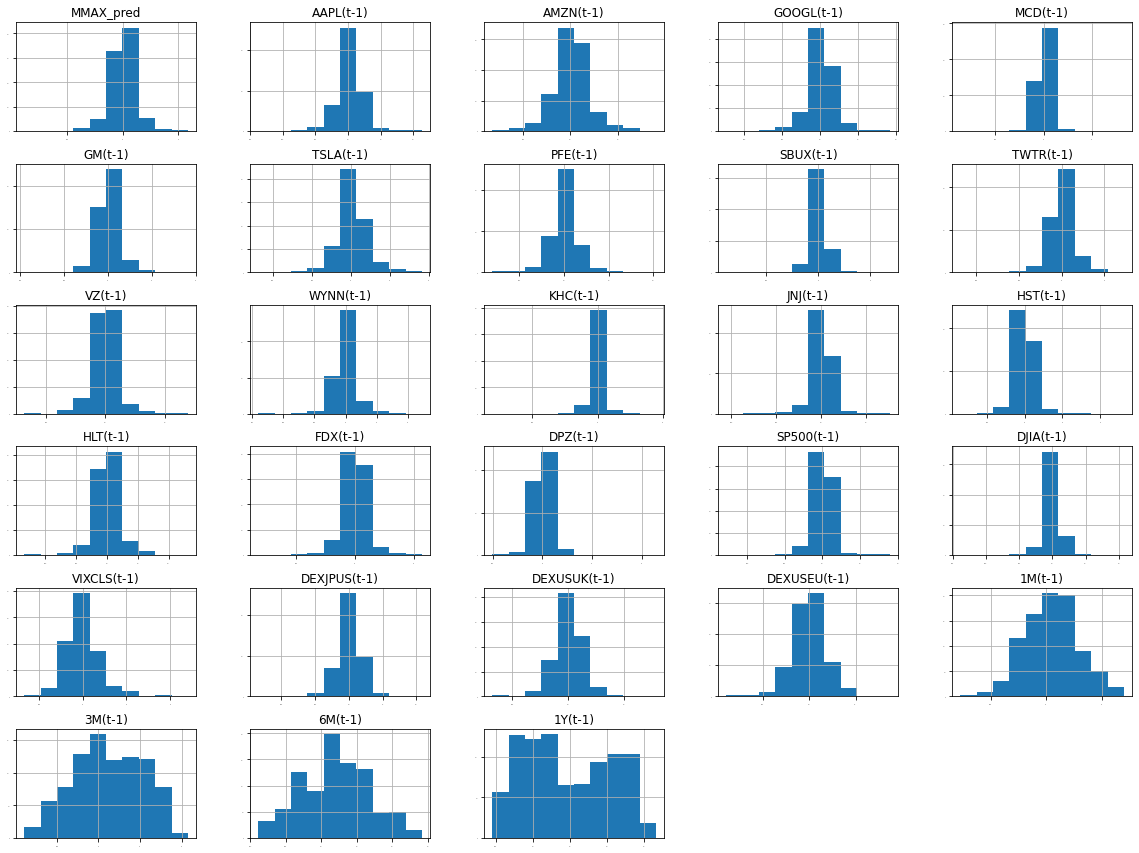

In [21]:
# Plot returns by using histogram
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(20,15))
plt.show()

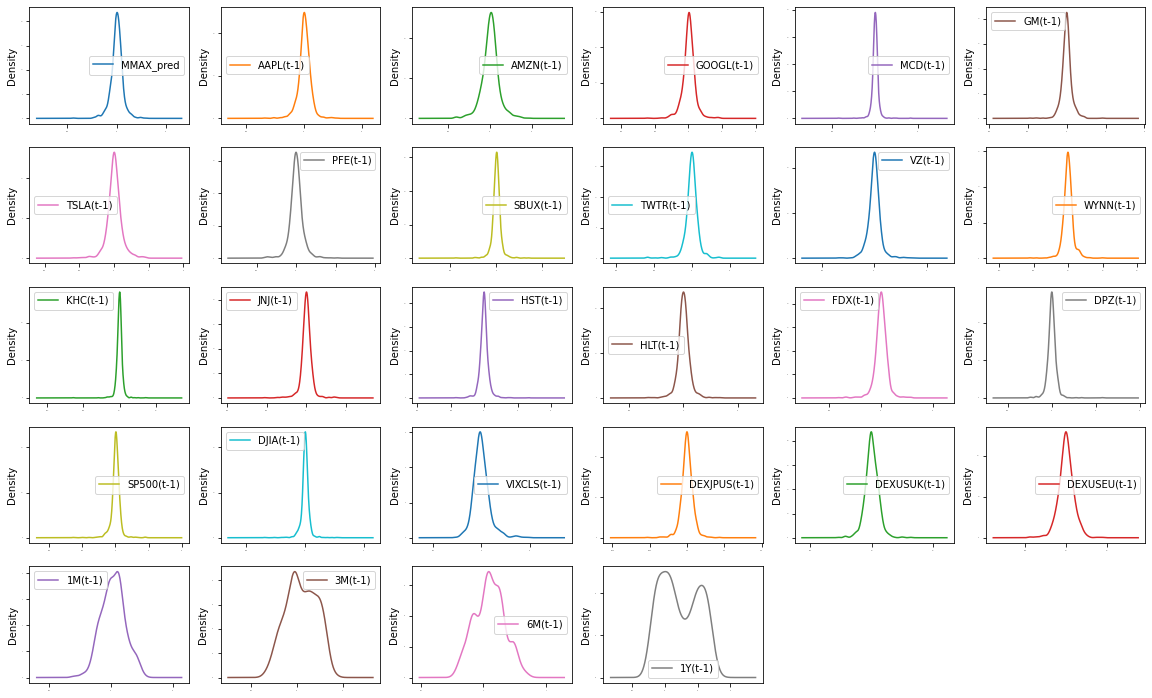

In [22]:
# Plot returns by using density
dataset.plot(kind='density', subplots=True, layout=(6,6), sharex=False, legend=True, fontsize=1, figsize=(20,15))
plt.show()

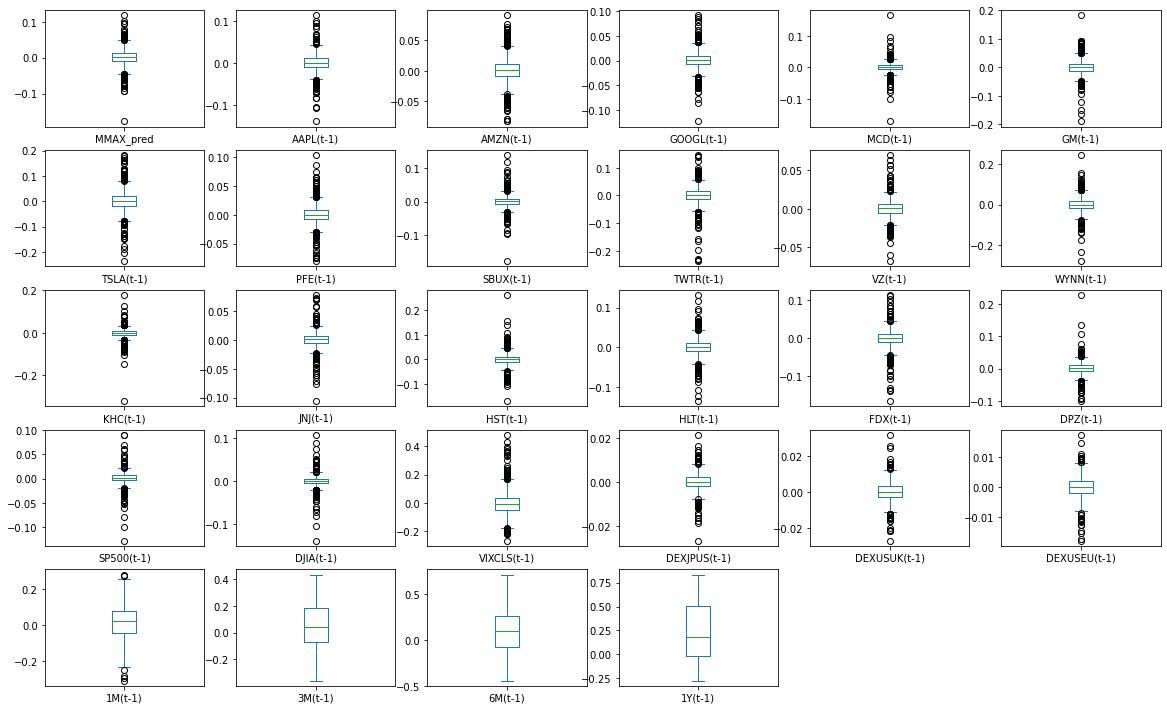

In [23]:
# Plot returns by using Boxplots and Whisker plots
dataset.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(20,15))
plt.show()

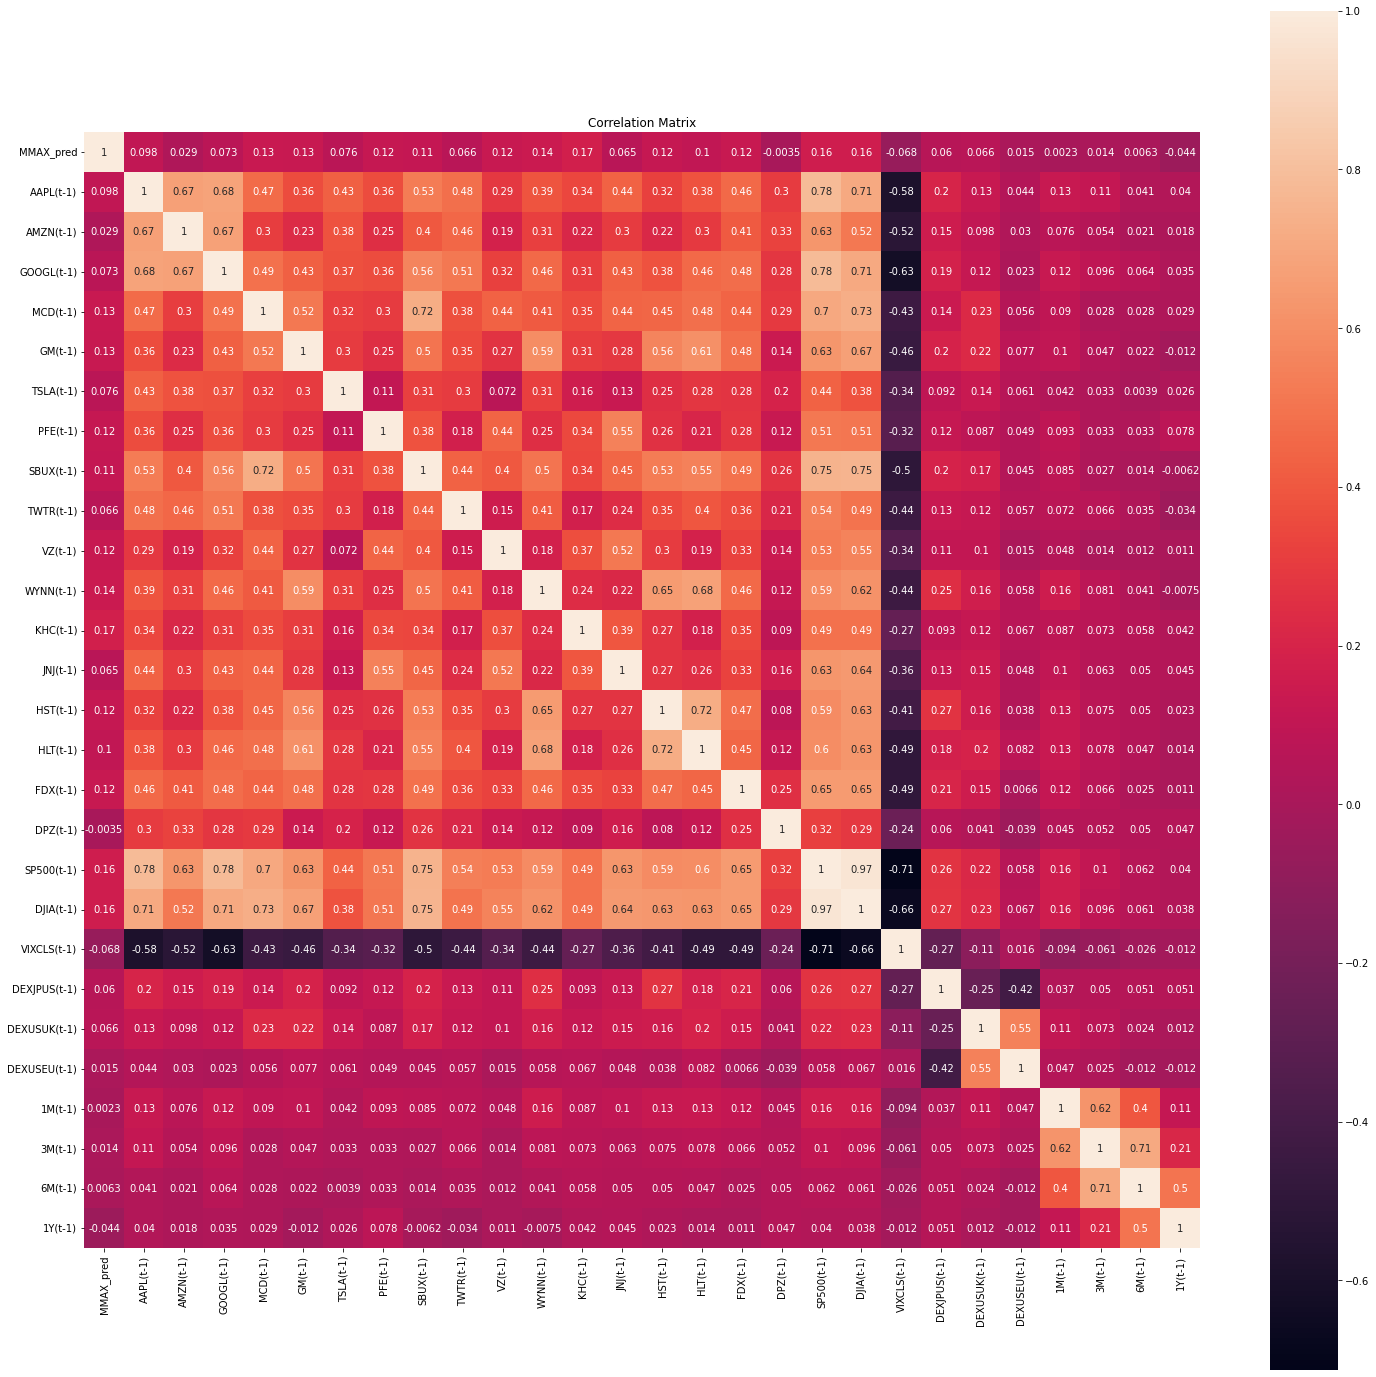

In [24]:
# Correlation
# The correlation chart indicates that there are weak relationship between predictors and target variables
correlation = dataset.corr()
plt.figure(figsize=(25,25))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True)

<Figure size 2520x2520 with 0 Axes>

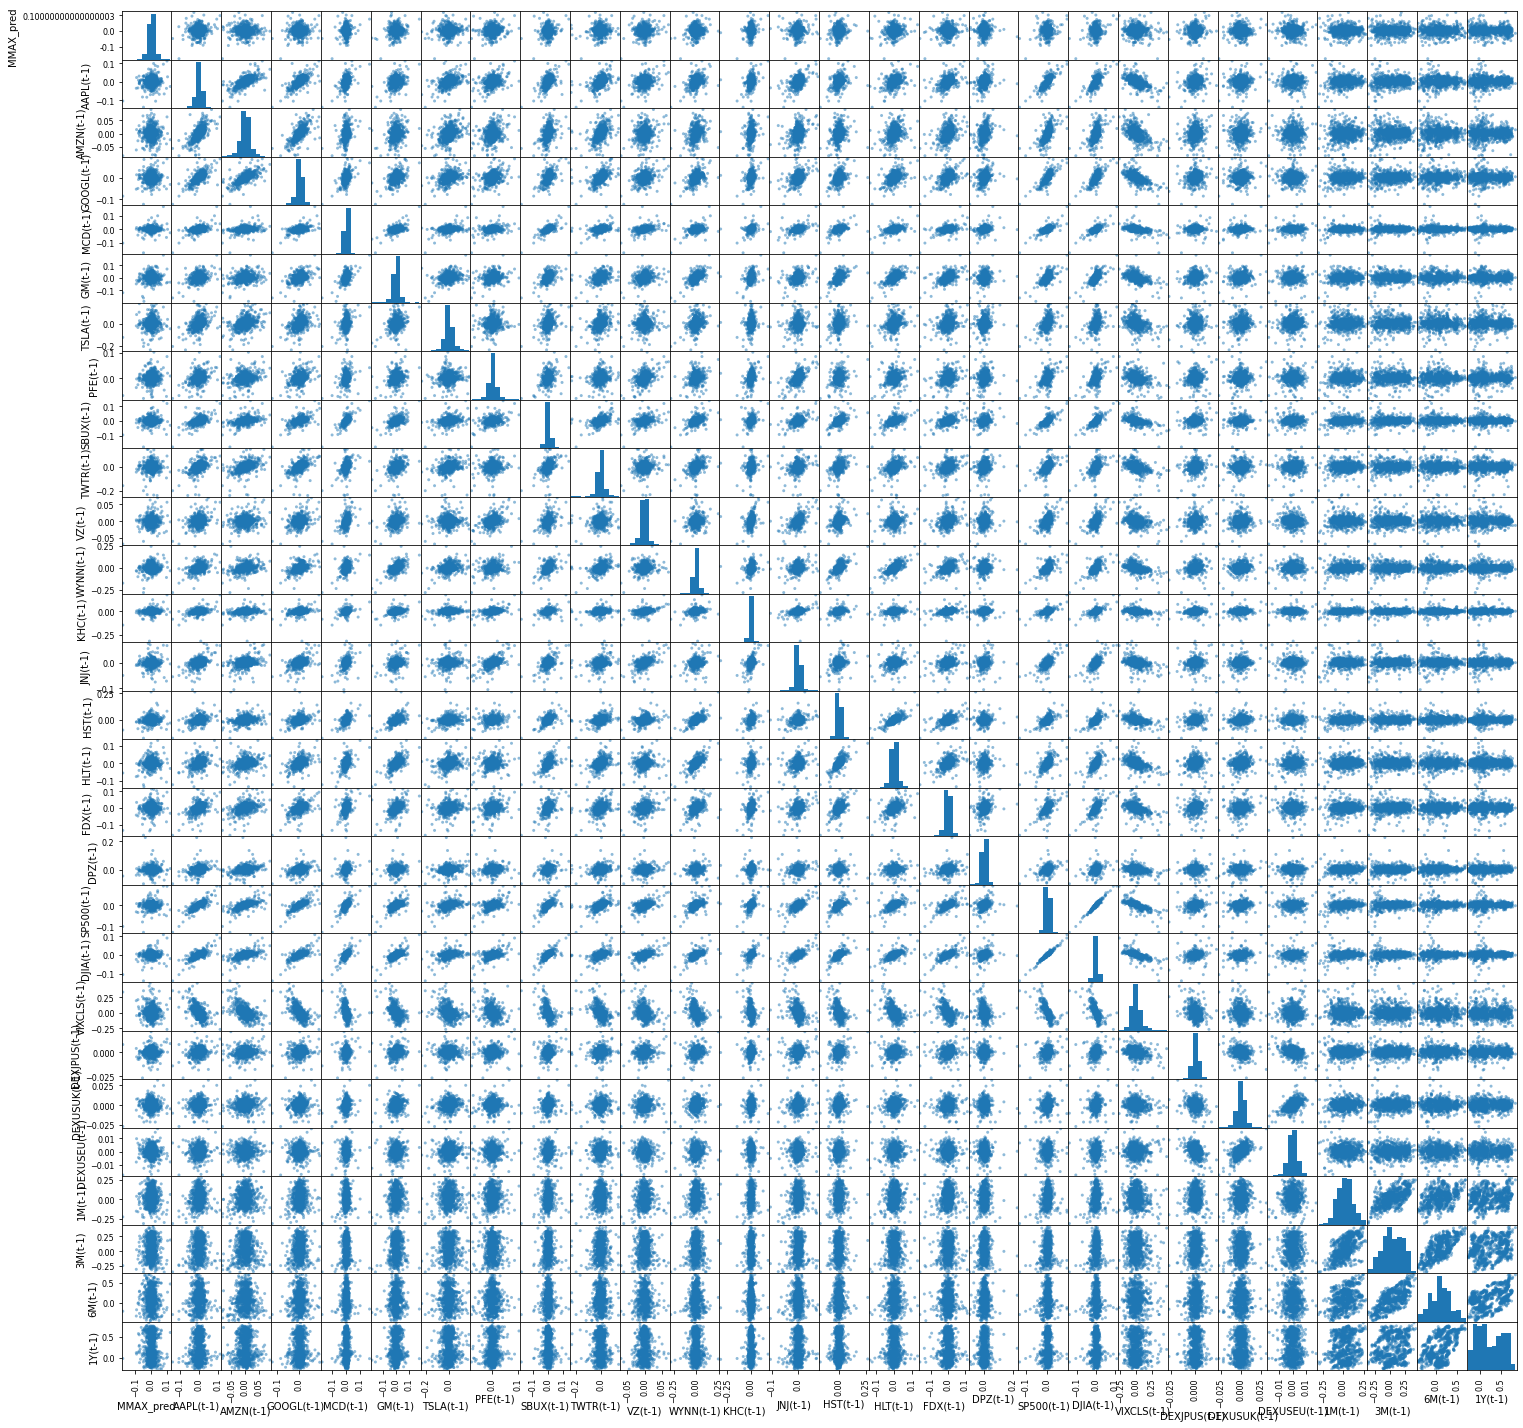

In [25]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix
plt.figure(figsize=(35,35))
scatter_matrix(dataset,figsize=(25,25))
plt.show()

### Time-Series Analysis

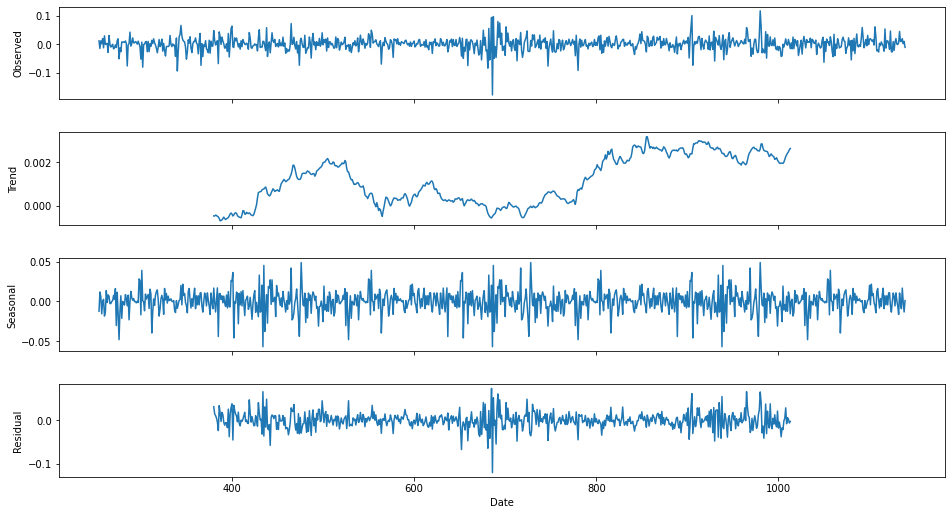

In [26]:
# Seasonality: the periodic signal in time series data
# Trend: whether the time series is decreasing, constant, or increasing over time
# Noise: what remains behind the separation of seasonality and trend from the time series
Y= dataset["MMAX_pred"]
res = sm.tsa.seasonal_decompose(Y,freq=252) # Time-Series Decomposition - splits time series data into several components
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

### Data Preparation

In [27]:
# check for missing value
dataset.isnull().sum()

MMAX_pred       0
AAPL(t-1)       0
AMZN(t-1)       0
GOOGL(t-1)      0
MCD(t-1)        0
GM(t-1)         0
TSLA(t-1)       0
PFE(t-1)        0
SBUX(t-1)       0
TWTR(t-1)       0
VZ(t-1)         0
WYNN(t-1)       0
KHC(t-1)        0
JNJ(t-1)        0
HST(t-1)        0
HLT(t-1)        0
FDX(t-1)        0
DPZ(t-1)        0
SP500(t-1)      0
DJIA(t-1)       0
VIXCLS(t-1)     0
DEXJPUS(t-1)    0
DEXUSUK(t-1)    0
DEXUSEU(t-1)    0
1M(t-1)         0
3M(t-1)         0
6M(t-1)         0
1Y(t-1)         0
dtype: int64

### Feature Selection

In [28]:
# define target variables and predictors
Y = dataset["MMAX_pred"]
X = dataset.loc[:, dataset.columns != 'MMAX_pred']

In [29]:
bestfeatures = SelectKBest(k=15, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']  # naming the dataframe columns
featureScores.nlargest(15,'Score').set_index('Specs')  # print 15 best features

,Score
Specs,
KHC(t-1),27.356090
DJIA(t-1),24.133526
SP500(t-1),23.535988
WYNN(t-1),18.518063
MCD(t-1),15.754153
GM(t-1),14.420091
VZ(t-1),13.956697
FDX(t-1),13.793158
PFE(t-1),12.900724


In [30]:
fit.pvalues_

array([3.50010570e-03, 3.96032391e-01, 3.07246721e-02, 7.79818612e-05,
       1.56224269e-04, 2.33506716e-02, 3.46570591e-04, 6.66554138e-04,
       4.91580902e-02, 1.99069267e-04, 1.87086999e-05, 2.11379317e-07,
       5.16196556e-02, 4.10392857e-04, 2.20559721e-03, 2.16874518e-04,
       9.17578963e-01, 1.44861585e-06, 1.07074676e-06, 4.38369260e-02,
       7.30464554e-02, 4.78704371e-02, 6.54822268e-01, 9.45055520e-01,
       6.68777743e-01, 8.52359899e-01, 1.91385878e-01])

### Standardization

In [31]:
scaler = StandardScaler().fit(X)
standardisedX = pd.DataFrame(scaler.fit_transform(X))

In [32]:
standardisedX.head(5)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.209851,-0.463636,-0.062709,1.507740,0.101105,-1.040943,0.298935,0.585495,0.425383,1.918000,...,0.089382,0.305865,-0.724115,-0.171626,0.092901,0.694693,-0.089520,-0.017051,1.111093,0.502637
1,-0.774597,-1.603401,-1.453794,-1.873641,-0.602202,-0.117825,-0.255655,-0.649796,-1.145047,-0.294120,...,-1.045745,-0.962612,2.706399,-0.844490,0.203225,1.474727,-0.521958,-0.464762,0.889421,0.304804
2,0.503659,0.799912,-0.371056,0.387705,0.349777,0.558442,-0.043745,-0.343491,0.455783,-0.534515,...,0.114134,0.055488,-1.002099,0.686324,-0.418034,-0.435450,-0.252682,-0.312432,0.919620,0.369101
3,-0.141941,-0.957061,-0.805382,-1.416155,-0.605661,0.099149,-0.321980,-0.617955,-0.775883,-0.004937,...,-0.670874,-0.505240,1.385096,0.961511,-1.447153,-2.007205,-0.363905,-0.349900,0.860591,0.560863
4,0.265931,1.187273,0.415797,-0.481509,0.121772,0.297429,0.201837,-1.438780,0.744991,2.591872,...,0.400627,0.251342,-0.721091,0.082690,-0.617882,-0.137895,-0.380137,-0.448112,0.914381,0.544155


# 2. Train models to predict the missing stock price of MMAX
*   Linear Regression
*   Lasso Regression
*   Elastic Net Regression
*   K-Nearest Neighbors
*   Decision Tree
*   Support Vector Regression
*   Multi-layer Perceptron
*   AdaBoost
*   Gradient Boosting
*   Random Forest
*   Extra Trees
*   AutoRegressive Integrated Moving Average (ARIMA)
*   Long Short-Term Memory (LSTM)

### Train Test Split

In [33]:
print(Y.shape)
print(X.shape)
print(len(X))

(886,)
(886, 27)
886


In [34]:
# Since this is time-series data, train and test split should be done based on sequential sample
test_size=0.25
seed=42
train_size=int(len(X) * (1-test_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [35]:
# Check post-split datasets shape
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(664, 27)
(222, 27)
(664,)
(222,)


In [36]:
# test options for regression
num_folds = 10
scoring ='neg_mean_squared_error'

### Compare Models

In [37]:
# List out all the algorithms and plot the error on train/test datasets to compare
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Neural Network
models.append(('MLP', MLPRegressor()))

# Ensable Models 
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))

# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

### K-Folds Cross Validation

In [38]:
names = []
kfold_results = []
test_results = []
train_results = []

print("Model,\t CrossValMean,\t CrossValSTD,\t train_MSE,\t test_MSE")
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    # converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    
    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result) 
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: \t  %f \t  (%f) \t   %f \t   %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

Model,	 CrossValMean,	 CrossValSTD,	 train_MSE,	 test_MSE
LR: 	  0.000590 	  (0.000165) 	   0.000526 	   0.000604
LASSO: 	  0.000587 	  (0.000205) 	   0.000586 	   0.000555
EN: 	  0.000587 	  (0.000205) 	   0.000586 	   0.000555
KNN: 	  0.000640 	  (0.000181) 	   0.000445 	   0.000647
CART: 	  0.001272 	  (0.000274) 	   0.000000 	   0.001740
SVR: 	  0.000756 	  (0.000366) 	   0.000623 	   0.000923
MLP: 	  0.000649 	  (0.000178) 	   0.000596 	   0.000769
ABR: 	  0.000662 	  (0.000251) 	   0.000411 	   0.000730
GBR: 	  0.000657 	  (0.000202) 	   0.000185 	   0.000942
RFR: 	  0.000627 	  (0.000224) 	   0.000085 	   0.000619
ETR: 	  0.000621 	  (0.000201) 	   0.000000 	   0.000629


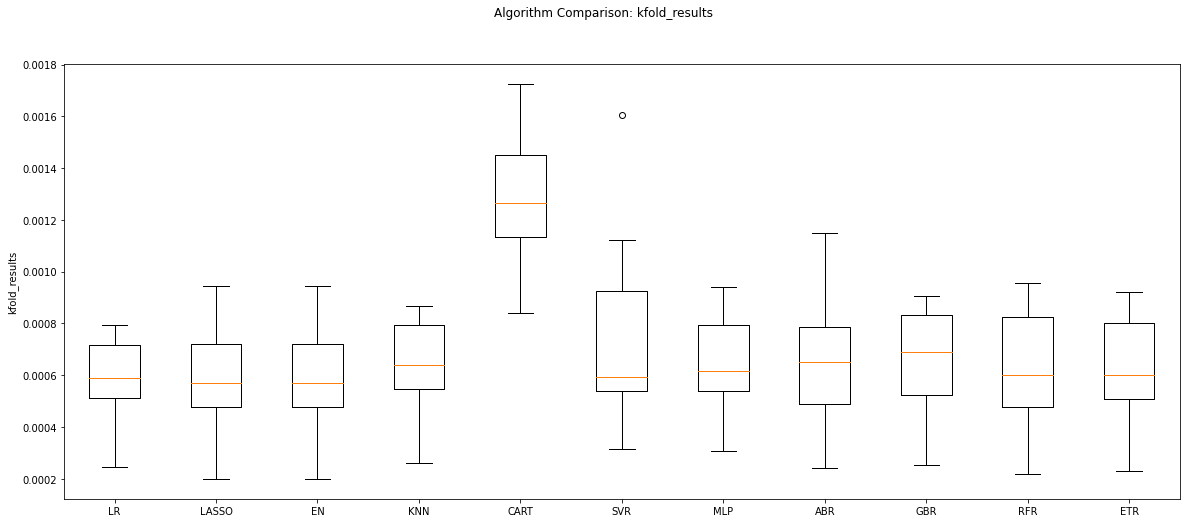

In [39]:
# compare kfold results of different algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison: kfold_results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
plt.ylabel('kfold_results')
fig.set_size_inches(20,8)
plt.show()

### Train & Test Error

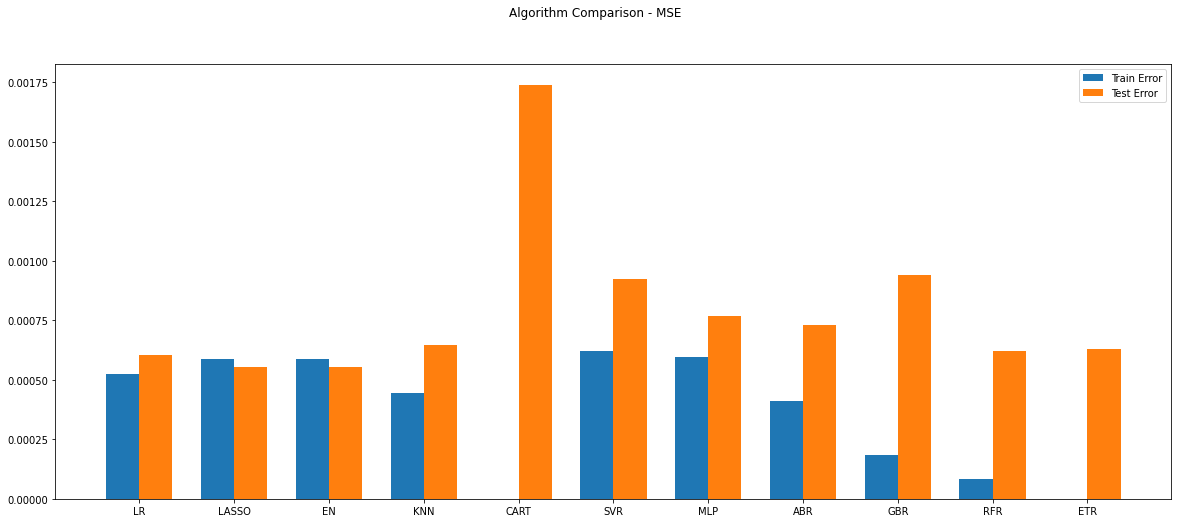

In [40]:
# compare MSE of different algorithms - the lower the better
# The chart below indicates that algorithm linear regression, Lasso, elastic net, k-nearest neighbors, random forest, and extra trees have relatively low error on test datasets
fig = plt.figure()

ind = np.arange(len(names))
width = 0.35

fig.suptitle('Algorithm Comparison - MSE')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(20,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

### ARIMA

In [41]:
# Preparing data for the ARIMAX Model, seperating endogeneous and exogenous variables
X_train_ARIMA=X_train
X_test_ARIMA=X_test
train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
to_len = len (X)

In [42]:
modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0]) # train ARIMA model and

model_fit = modelARIMA.fit()

error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = train_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)

test_results.append(error_Test_ARIMA)
train_results.append(error_Training_ARIMA)

names.append("ARIMA")
print('ARIMA test error:\t',error_Test_ARIMA) # print ARIMA model MSE on test dataset
print('ARIMA train error:\t',error_Training_ARIMA) # print ARIMA model MSE on train dataset

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA test error:	 0.0006020914342899314
ARIMA train error:	 0.0005189046612208912


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


### LSTM

In [43]:
# Preparing data for the LSTM Model
X_train_LSTM, X_test_LSTM = np.array(X_train), np.array(X_test)
Y_train_LSTM, Y_test_LSTM = np.array(Y_train), np.array(Y_test)
X_train_LSTM= X_train_LSTM.reshape((X_train_LSTM.shape[0], 1, X_train_LSTM.shape[1]))
X_test_LSTM= X_test_LSTM.reshape((X_test_LSTM.shape[0], 1, X_test_LSTM.shape[1]))
print(X_train_LSTM.shape, Y_train_LSTM.shape, X_test_LSTM.shape, Y_test_LSTM.shape)

(664, 1, 27) (664,) (222, 1, 27) (222,)


In [44]:
# design network
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM,Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),epochs=50, batch_size=72, verbose=0, shuffle=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


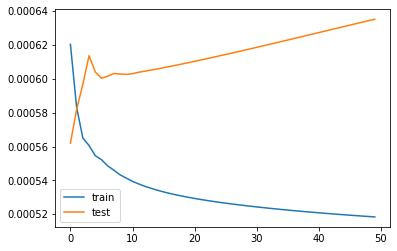

In [45]:
# Visual plot shows that the error is decreasing in train dataset but increasing in test dataset
plt.plot(LSTMModel_fit.history['loss'], label='train')
plt.plot(LSTMModel_fit.history['val_loss'], label='test')
plt.legend()
plt.show()

In [46]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

train_results.append(error_Training_LSTM)
test_results.append(error_Test_LSTM)
names.append("LSTM")

# # print MSEs and RMSE on test dataset for both ARIMA and LSTM models
print('ARIMA')
print('MSE:\t ',error_Test_ARIMA, '\t RMSE:\t ', np.sqrt(error_Test_ARIMA))

print('LSTM')
print('MSE:\t ',error_Test_LSTM, '\t RMSE:\t ', np.sqrt(error_Test_LSTM))

ARIMA
MSE:	  0.0006020914342899314 	 RMSE:	  0.02453755151374993
LSTM
MSE:	  0.0006352099495510537 	 RMSE:	  0.025203371789327193


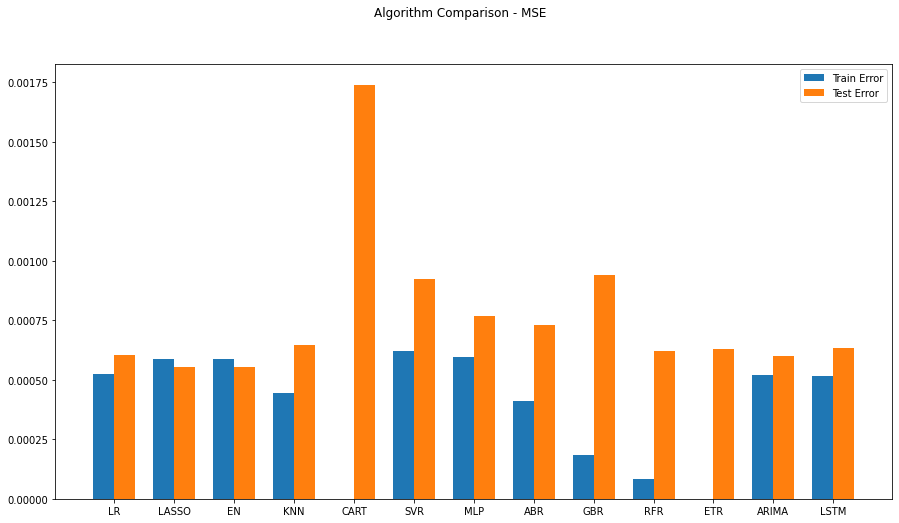

In [47]:
# Check the all MSE again
fig = plt.figure()

ind = np.arange(len(names))
width = 0.35

fig.suptitle('Algorithm Comparison - MSE')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

### 1b. As this is time-series dataset, so the model with lower mean squared error on test dataset is better. There are eight models have relatively low MSE so I decide to use grid search to tune these eight models. 
*   Linear Regression
*   LASSO
*   Elastic Net Regression
*   K-Nearest Neighbors
*   Random Forest
*   Extra Trees
*   AutoRegressive Integrated Moving Average (ARIMA)
*   Long-Short Term Memory (LSTM)

# Grid Search to Optimize Models

### Grid Search for Linear Regression

In [48]:
param_grid = {'fit_intercept': [True, False]}
model = LinearRegression()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best score %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best score -0.000590 using {'fit_intercept': True}
-0.000590 (0.000165) with: {'fit_intercept': True}
-0.000592 (0.000163) with: {'fit_intercept': False}


### Grid Search for LASSO

In [49]:
param_grid = {'alpha': [0.01, 0.1, 0.3, 0.7, 1, 1.5, 3, 5]}
model = Lasso()
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000587 using {'alpha': 0.01}
-0.000587 (0.000205) with: {'alpha': 0.01}
-0.000587 (0.000205) with: {'alpha': 0.1}
-0.000587 (0.000205) with: {'alpha': 0.3}
-0.000587 (0.000205) with: {'alpha': 0.7}
-0.000587 (0.000205) with: {'alpha': 1}
-0.000587 (0.000205) with: {'alpha': 1.5}
-0.000587 (0.000205) with: {'alpha': 3}
-0.000587 (0.000205) with: {'alpha': 5}


### Grid Search for Elastic Net Regression

In [50]:
param_grid = {'alpha': [0.01, 0.1, 0.3, 0.7, 1, 1.5, 3, 5],
              'l1_ratio': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]}
model = ElasticNet()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000582 using {'alpha': 0.01, 'l1_ratio': 0.01}
-0.000582 (0.000205) with: {'alpha': 0.01, 'l1_ratio': 0.01}
-0.000587 (0.000205) with: {'alpha': 0.01, 'l1_ratio': 0.1}
-0.000587 (0.000205) with: {'alpha': 0.01, 'l1_ratio': 0.3}
-0.000587 (0.000205) with: {'alpha': 0.01, 'l1_ratio': 0.5}
-0.000587 (0.000205) with: {'alpha': 0.01, 'l1_ratio': 0.7}
-0.000587 (0.000205) with: {'alpha': 0.01, 'l1_ratio': 0.9}
-0.000587 (0.000205) with: {'alpha': 0.01, 'l1_ratio': 0.99}
-0.000587 (0.000205) with: {'alpha': 0.1, 'l1_ratio': 0.01}
-0.000587 (0.000205) with: {'alpha': 0.1, 'l1_ratio': 0.1}
-0.000587 (0.000205) with: {'alpha': 0.1, 'l1_ratio': 0.3}
-0.000587 (0.000205) with: {'alpha': 0.1, 'l1_ratio': 0.5}
-0.000587 (0.000205) with: {'alpha': 0.1, 'l1_ratio': 0.7}
-0.000587 (0.000205) with: {'alpha': 0.1, 'l1_ratio': 0.9}
-0.000587 (0.000205) with: {'alpha': 0.1, 'l1_ratio': 0.99}
-0.000587 (0.000205) with: {'alpha': 0.3, 'l1_ratio': 0.01}
-0.000587 (0.000205) with: {'alpha': 0.3, 'l1_r

### Grid Search for K-Nearest Neighbors

In [51]:
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21]}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000600 using {'n_neighbors': 13}
-0.001058 (0.000191) with: {'n_neighbors': 1}
-0.000719 (0.000182) with: {'n_neighbors': 3}
-0.000640 (0.000181) with: {'n_neighbors': 5}
-0.000633 (0.000186) with: {'n_neighbors': 7}
-0.000618 (0.000206) with: {'n_neighbors': 9}
-0.000608 (0.000208) with: {'n_neighbors': 11}
-0.000600 (0.000206) with: {'n_neighbors': 13}
-0.000603 (0.000211) with: {'n_neighbors': 15}
-0.000600 (0.000209) with: {'n_neighbors': 17}
-0.000602 (0.000214) with: {'n_neighbors': 19}
-0.000604 (0.000213) with: {'n_neighbors': 21}


### Grid Search for Random Forest

In [52]:
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000620 using {'n_estimators': 350}
-0.000643 (0.000225) with: {'n_estimators': 50}
-0.000633 (0.000212) with: {'n_estimators': 100}
-0.000632 (0.000225) with: {'n_estimators': 150}
-0.000625 (0.000220) with: {'n_estimators': 200}
-0.000629 (0.000220) with: {'n_estimators': 250}
-0.000624 (0.000216) with: {'n_estimators': 300}
-0.000620 (0.000214) with: {'n_estimators': 350}
-0.000625 (0.000216) with: {'n_estimators': 400}


### Grid Search for Extra Trees Regression

In [53]:
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000610 using {'n_estimators': 200}
-0.000614 (0.000202) with: {'n_estimators': 50}
-0.000614 (0.000202) with: {'n_estimators': 100}
-0.000612 (0.000201) with: {'n_estimators': 150}
-0.000610 (0.000200) with: {'n_estimators': 200}
-0.000614 (0.000202) with: {'n_estimators': 250}
-0.000611 (0.000201) with: {'n_estimators': 300}
-0.000611 (0.000202) with: {'n_estimators': 350}
-0.000610 (0.000203) with: {'n_estimators': 400}


### Grid Search for ARIMA

In [54]:
def evaluate_arima_model(arima_order):
    
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()   

    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)

import warnings
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.0005257
ARIMA(0, 0, 1) MSE=0.0005181
ARIMA(1, 0, 0) MSE=0.0005189
ARIMA(1, 0, 1) MSE=0.0005148
ARIMA(2, 0, 0) MSE=0.0005170
ARIMA(2, 0, 1) MSE=0.0005170
Best ARIMA(1, 0, 1) MSE=0.0005148


### Grid Search for LSTM

In [55]:
#Grid Search for LSTM Model

# evaluate an LSTM model for a given order (p,d,q)
def evaluate_LSTM_model(neurons=12, learn_rate = 0.01, momentum=0):
    #predicted = list()     
    LSTMModel = create_LSTMmodel(neurons, learn_rate, momentum)
    LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM,epochs=50, batch_size=72, verbose=0, shuffle=False)
    predicted = LSTMModel.predict(X_test_LSTM)
    error = mean_squared_error(predicted, Y_test)
    return error

# evaluate combinations of different variables of LSTM Model
def evaluate_combinations_LSTM(neurons, learn_rate, momentum): 
    best_score, best_cfg = float("inf"), None
    for n in neurons:
        for l in learn_rate:
            for m in momentum:
                combination = (n,l,m)                
                try:
                    mse = evaluate_LSTM_model(n,l,m)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, combination
                    print('LSTM%s MSE=%.7f' % (combination,mse))
                except:
                    continue
    print('Best LSTM%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
neurons = [1, 5]
learn_rate = [0.001, 0.3]
momentum = [0.0, 0.9]
#Other Parameters can be modified as well
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
warnings.filterwarnings("ignore")
evaluate_combinations_LSTM(neurons,learn_rate,momentum)    

LSTM(1, 0.001, 0.0) MSE=0.0006516
LSTM(1, 0.001, 0.9) MSE=0.0006317
LSTM(1, 0.3, 0.0) MSE=0.0006267
LSTM(1, 0.3, 0.9) MSE=0.0006392
LSTM(5, 0.001, 0.0) MSE=0.0006394
LSTM(5, 0.001, 0.9) MSE=0.0006378
LSTM(5, 0.3, 0.0) MSE=0.0006388
LSTM(5, 0.3, 0.9) MSE=0.0006308
Best LSTM(1, 0.3, 0.0) MSE=0.0006267


# Calculate the MSE on test dataset for Each Model After Tuning

In [56]:
tuning_model=[]
model_mse=[]

### Results on Test Data by Using Linear Regression

In [57]:
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, Y_train)
lr_pred = lr_model.predict(X_test)
tuning_model.append('Linear Regression')
model_mse.append(mean_squared_error(Y_test, lr_pred))
# print(mean_squared_error(Y_test, lr_pred))

### Results on Test Data by Using LASSO

In [58]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, Y_train)
lasso_pred = lasso_model.predict(X_test)
tuning_model.append('Lasso')
model_mse.append(mean_squared_error(Y_test, lasso_pred))
# print(mean_squared_error(Y_test, lasso_pred))

### Results on Test Data by Using Elastic Net Regression Model

In [59]:
en_model = ElasticNet(alpha=0.01,l1_ratio=0.01)
en_model.fit(X_train, Y_train)
en_pred = en_model.predict(X_test)
tuning_model.append('Elastic Net')
model_mse.append(mean_squared_error(Y_test, en_pred))
# print(mean_squared_error(Y_test, en_pred))

### Results on Test Data by Using K-Nearest Neighbors

In [60]:
knn_model=KNeighborsRegressor(n_neighbors=13)
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_test)
tuning_model.append('K-Nearest Neighbors')
model_mse.append(mean_squared_error(Y_test, knn_pred))
# print(mean_squared_error(Y_test, knn_pred))

### Results on Test Data by Using Random Forest

In [61]:
rf_model=RandomForestRegressor(n_estimators=350)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
tuning_model.append('Random Forest')
model_mse.append(mean_squared_error(Y_test, rf_pred))
# print(mean_squared_error(Y_test, rf_pred))

### Results on Test Data by Using Extra Trees Regression

In [62]:
etr_model = ExtraTreesRegressor(n_estimators=200, random_state=seed)
etr_model.fit(X_train, Y_train)
etr_pred = etr_model.predict(X_test)
tuning_model.append('Extra Trees')
model_mse.append(mean_squared_error(Y_test, etr_pred))
# print(mean_squared_error(Y_test, etr_pred))

### Results on Test Data by Using ARIMA

In [63]:
predicted = list()     
modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=(1, 0, 1))
model_fit = modelARIMA.fit()   

tr_len = len(X_train_ARIMA)
to_len = len(X_train_ARIMA) + len(X_test_ARIMA)
arima_pred = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
tuning_model.append('ARIMA')
model_mse.append(mean_squared_error(Y_test, arima_pred))
# print(mean_squared_error(arima_pred, Y_test))

### Results on Test Data by Using LSTM

In [64]:
predicted = list()
LSTMModel = create_LSTMmodel(1, 0.3, 0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM,epochs=50, batch_size=72, verbose=0, shuffle=False)
lstm_pred = LSTMModel.predict(X_test_LSTM)
tuning_model.append('LSTM')
model_mse.append(mean_squared_error(Y_test, lstm_pred))
# print(mean_squared_error(lstm_pred, Y_test))

In [65]:
# create a dataframe and sort out the MSE in acending order
mse_df=pd.DataFrame()
mse_df['Model Name']=tuning_model
mse_df['Model MSE on Test Data']=model_mse

In [66]:
mse_df.sort_values('Model MSE on Test Data')

,Model Name,Model MSE on Test Data
1,Lasso,0.000555
2,Elastic Net,0.000572
6,ARIMA,0.000594
0,Linear Regression,0.000604
3,K-Nearest Neighbors,0.000612
5,Extra Trees,0.000620
7,LSTM,0.000634
4,Random Forest,0.000644


# Finalize the model

### Lasso Regression model has lowest MSE on test dataset after hyperparameter tuning. Therefore Lasso will be the final model.

In [72]:
lasso_pred

array([0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058829,
       0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058829,
       0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058829,
       0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058829,
       0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058829,
       0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058829,
       0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058829,
       0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058829,
       0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058829,
       0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058829,
       0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058829,
       0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058829,
       0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058829,
       0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058829,
       0.00058829, 0.00058829, 0.00058829, 0.00058829, 0.00058

In [73]:
lasso_pred_return=np.exp(lasso_pred)
lasso_pred_return

array([1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058846,
       1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058846,
       1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058846,
       1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058846,
       1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058846,
       1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058846,
       1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058846,
       1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058846,
       1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058846,
       1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058846,
       1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058846,
       1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058846,
       1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058846,
       1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058846,
       1.00058846, 1.00058846, 1.00058846, 1.00058846, 1.00058

In [74]:
# find the MMAX price on date 1140
stock_price.loc[1140,'MMAX']

112.935577392578

In [75]:
lasso_pred_return[-1]

1.0005884586213165

In [76]:
# multiply the price on day 1140 and the last available return together to get the last day price for MMAX
last_day_price=stock_price.loc[1140,'MMAX'] * lasso_pred_return[-1]
print("The price of MMAX on day 1141 is ${}.".format(round(last_day_price,2)))

The price of MMAX on day 1141 is $113.0.


### Confidence in the prediction

In [135]:
# calculate the mean of exponential MMAX return
mean=np.exp(Y_test).mean()
mean

1.0024684095580034

In [136]:
# calculate the standard deviation of exponential MMAX return
stdev=np.exp(Y_test).std()
stdev

0.023730968360833684

In [137]:
# calculate the number of prediction
num=len(Y_test)
num

222

In [138]:
# assume confidence level is 0.95 to calculate the z-statistic
import scipy.stats as st
z=st.norm.ppf(.975) # determine the density points where 95% of the distribution is included
z

1.959963984540054

In [139]:
lb=mean-z*(stdev/np.sqrt(num))
ub=mean+z*(stdev/np.sqrt(num))
print(lb, ub)

0.9993467390306386 1.0055900800853683


In [140]:
# calculate 95% confidence interval of the prediction
lb_price=stock_price.loc[1140,'MMAX']*lb
up_price=stock_price.loc[1140,'MMAX']*ub

print("The 95% confidence interval of the prediction is (${}, ${}).".format(round(lb_price,2), round(up_price,2)))

The 95% confidence interval of the prediction is ($112.86, $113.57).


### Based on the calculated confidence interval of the prediction, I am 95% confident that the price of MMAX on the day 1141 is between 112.86 and 113.57.